In [15]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import jieba.analyse
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import jieba.posseg as pseg
from tqdm import tqdm
import collections
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('..\data\score_df.csv',index_col = 0,dtype = {'simple review':str,'review':str,})

In [3]:
df

,外观,内饰,空间,舒适,油耗,动力,操控,性价比
沃尔沃S90,4.88分,4.70分,4.93分,4.59分,4.38分,4.81分,4.84分,4.98分
宝马5系,4.73分,4.44分,4.80分,4.47分,4.33分,4.72分,4.77分,4.41分
雷克萨斯ES,4.79分,4.56分,4.57分,4.74分,4.67分,4.27分,4.28分,4.48分
奥迪Q5L,4.70分,4.33分,4.71分,4.50分,4.56分,4.64分,4.56分,4.62分
凯迪拉克CT5,4.76分,4.51分,4.34分,4.60分,4.37分,4.76分,4.77分,4.61分
奥迪A4L,4.84分,4.71分,4.51分,4.57分,4.49分,4.79分,4.54分,4.55分
宝马3系,4.86分,4.26分,4.52分,4.30分,4.45分,4.62分,4.80分,4.50分


In [4]:
df.loc['奔驰E系'] = {'外观': '4.68分','内饰': '4.74分','空间':'4.73分',
             '舒适': '4.55分','油耗': '4.21分','动力': '4.41分',
             '操控': '4.40分', '性价比': '4.07分'}
df.loc['奔驰C系'] = {'外观': '4.74分','内饰': '4.71分','空间':'4.32分',
             '舒适': '4.41分','油耗': '4.03分','动力': '4.3分',
             '操控': '4.41分', '性价比': '4.34分'}
df

,外观,内饰,空间,舒适,油耗,动力,操控,性价比
沃尔沃S90,4.88分,4.70分,4.93分,4.59分,4.38分,4.81分,4.84分,4.98分
宝马5系,4.73分,4.44分,4.80分,4.47分,4.33分,4.72分,4.77分,4.41分
雷克萨斯ES,4.79分,4.56分,4.57分,4.74分,4.67分,4.27分,4.28分,4.48分
奥迪Q5L,4.70分,4.33分,4.71分,4.50分,4.56分,4.64分,4.56分,4.62分
凯迪拉克CT5,4.76分,4.51分,4.34分,4.60分,4.37分,4.76分,4.77分,4.61分
奥迪A4L,4.84分,4.71分,4.51分,4.57分,4.49分,4.79分,4.54分,4.55分
宝马3系,4.86分,4.26分,4.52分,4.30分,4.45分,4.62分,4.80分,4.50分
奔驰E系,4.68分,4.74分,4.73分,4.55分,4.21分,4.41分,4.40分,4.07分
奔驰C系,4.74分,4.71分,4.32分,4.41分,4.03分,4.3分,4.41分,4.34分


In [5]:
df.index

Index(['沃尔沃S90', '宝马5系', '雷克萨斯ES', '奥迪Q5L', '凯迪拉克CT5', '奥迪A4L', '宝马3系', '奔驰E系',
       '奔驰C系'],
      dtype='object')

In [7]:
len(df)

9

In [8]:
for i in range(len(df)):
    locals()['lst'+str(i)] = [float(i.strip('分')) for i in df.iloc[i,:]]
    locals()['value'+str(i)] = np.array(locals()['lst'+str(i)])    

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

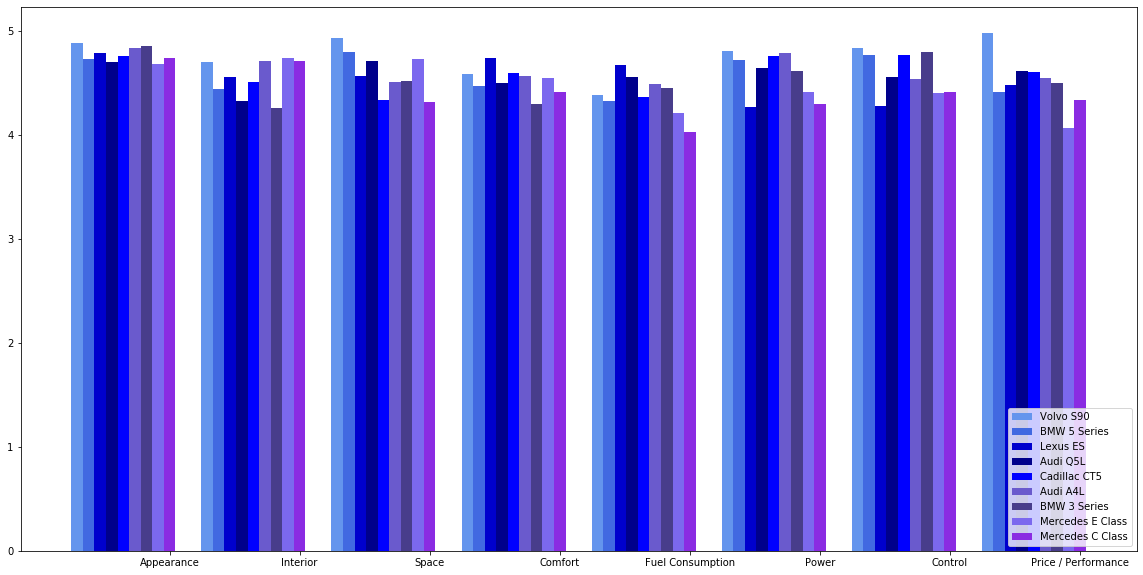

In [19]:
fig = plt.figure(figsize=(20,10)) 
name_list = ['外观', '内饰','空间', '舒适', '油耗', '动力', '操控', '性价比']
name_list_en = ['Appearance', 'Interior', 'Space', 'Comfort', 'Fuel Consumption', 'Power', 'Control', 'Price / Performance']
color = ['cornflowerblue','royalblue','mediumblue','darkblue','blue','slateblue','darkslateblue',
         'mediumslateblue','blueviolet']
brand = ['沃尔沃S90','宝马5系','雷克萨斯ES','奥迪Q5L','凯迪拉克CT5','奥迪A4L','宝马3系','奔驰E系','奔驰C系']
branden = ['Volvo S90','BMW 5 Series','Lexus ES','Audi Q5L','Cadillac CT5','Audi A4L','BMW 3 Series','Mercedes E Class','Mercedes C Class']

x =list(range(len(value1)))
total_width, n = 0.8, 9
width = total_width / n

for j in range(8):
    plt.bar(x, locals()['value'+str(j)], width=width, label=branden[j],fc = color[j])
    for i in range(len(x)):
        x[i] = x[i] + width
#     plt.bar(x, value2, width=width, label='boy',fc = 'b')
# for i in range(len(x)):
#     x[i] = x[i] + width
plt.bar(x, value8, width=width, label=branden[8],tick_label = name_list_en,fc = color[8])
plt.legend(loc = 'lower right')
plt.show()


0,1,2,4,7,8

只看外观和内饰：0,5,6,7,8

E

(<a list of 18 Line2D ticklines objects>,
 <a list of 9 Text major ticklabel objects>)

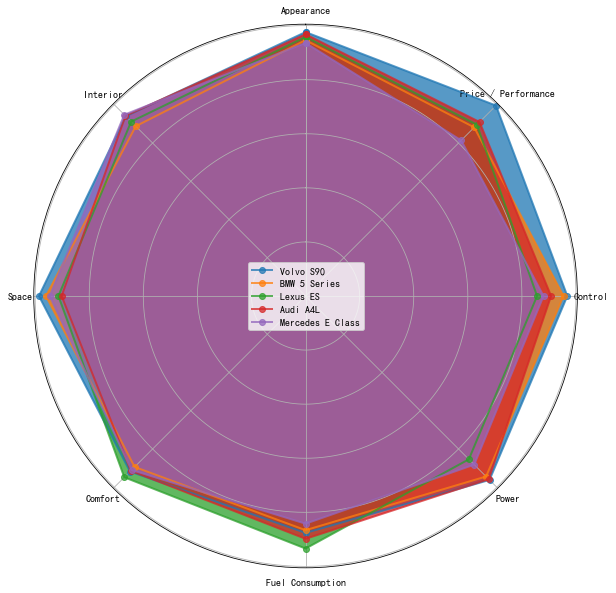

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure(figsize=(20,10)) 

name = ['外观', '内饰','空间', '舒适', '油耗', '动力', '操控', '性价比']
name_list_en = ['Appearance', 'Interior', 'Space', 'Comfort', 'Fuel Consumption', 'Power', 'Control', 'Price / Performance']
branden = ['Volvo S90','BMW 5 Series','Lexus ES','Audi Q5L','Cadillac CT5','Audi A4L','BMW 3 Series','Mercedes E Class','Mercedes C Class']
brand = ['沃尔沃S90','宝马5系','雷克萨斯ES','奥迪Q5L','凯迪拉克CT5','奥迪A4L','宝马3系','奔驰E系','奔驰C系']
theta = np.linspace(0,2*np.pi,len(name),endpoint=False)    #将圆根据标签的个数等比分

for i in range(len(df)):
    locals()['lst'+str(i)] = [float(i.strip('分')) for i in df.iloc[i,:]]
    locals()['value'+str(i)] = np.array(locals()['lst'+str(i)])
    locals()['value'+str(i)] = np.concatenate((locals()['value'+str(i)],[locals()['value'+str(i)][0]]))  #闭合
    
theta = np.concatenate((theta,[theta[0]]))
ax = plt.subplot(111,projection = 'polar')      #构建图例

for i in [0,1,2,5,7]:
    ax.plot(theta,locals()['value'+str(i)],'o-',lw=2,alpha = 0.75,label=branden[i])    #绘图
    ax.fill(theta,locals()['value'+str(i)],'o-',alpha = 0.75)           #填充

ax.set_thetagrids(theta*180/np.pi,name_list_en)         #替换标签
# ax.set_ylim(0,110)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
# ax.set_title('Sentiment of bad review',fontsize= 10)   #添加图描述
ax.tick_params('y', labelleft=False)
plt.legend(loc = 'center')
plt.show()

(<a list of 18 Line2D ticklines objects>,
 <a list of 9 Text major ticklabel objects>)

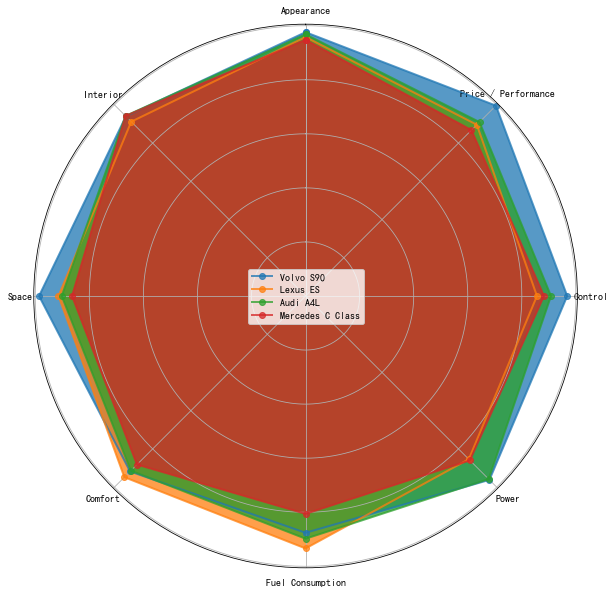

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure(figsize=(10,10)) 

name = ['外观', '内饰','空间', '舒适', '油耗', '动力', '操控', '性价比']
name_list_en = ['Appearance', 'Interior', 'Space', 'Comfort', 'Fuel Consumption', 'Power', 'Control', 'Price / Performance']
branden = ['Volvo S90','BMW 5 Series','Lexus ES','Audi Q5L','Cadillac CT5','Audi A4L','BMW 3 Series','Mercedes E Class','Mercedes C Class']
brand = ['沃尔沃S90','宝马5系','雷克萨斯ES','奥迪Q5L','凯迪拉克CT5','奥迪A4L','宝马3系','奔驰E系','奔驰C系']
theta = np.linspace(0,2*np.pi,len(name),endpoint=False)    #将圆根据标签的个数等比分

for i in range(len(df)):
    locals()['lst'+str(i)] = [float(i.strip('分')) for i in df.iloc[i,:]]
    locals()['value'+str(i)] = np.array(locals()['lst'+str(i)])
    locals()['value'+str(i)] = np.concatenate((locals()['value'+str(i)],[locals()['value'+str(i)][0]]))  #闭合
    
theta = np.concatenate((theta,[theta[0]]))
ax = plt.subplot(111,projection = 'polar')      #构建图例

for i in [0,2,5,8]:
    ax.plot(theta,locals()['value'+str(i)],'o-',lw=2,alpha = 0.75,label=branden[i])    #绘图
    ax.fill(theta,locals()['value'+str(i)],'o-',alpha = 0.75)           #填充

ax.set_thetagrids(theta*180/np.pi,name_list_en)         #替换标签
# ax.set_ylim(0,110)                          #设置极轴的区间
ax.set_theta_zero_location('N')         #设置极轴方向
# ax.set_title('Sentiment of bad review',fontsize= 10)   #添加图描述
ax.tick_params('y', labelleft=False)
plt.legend(loc = 'center')
plt.show()